# Regressions

Outline:
- Linear
- Decision Tree
- Random Forest
- XGBoost
- Model Selection

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/scores_synth.csv")
print(data.shape)
data

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1
...,...,...,...
995,8.801915,464.993872,0
996,15.317348,641.288260,1
997,25.411924,641.858088,1
998,4.898013,447.408180,0


In [4]:
data.describe()

,income,score,internet_connection
count,1000.000000,1000.000000,1000.000000
mean,25.132120,609.472997,0.691000
std,17.217098,82.097653,0.462312
min,0.893344,294.585973,0.000000
25%,13.581826,553.830647,0.000000
50%,19.073273,612.714370,1.000000
75%,34.970305,668.431175,1.000000
max,77.006947,845.859379,1.000000


In [4]:
Y = data['score']
X = data[['income']]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, shuffle=True)

<AxesSubplot:xlabel='income', ylabel='score'>

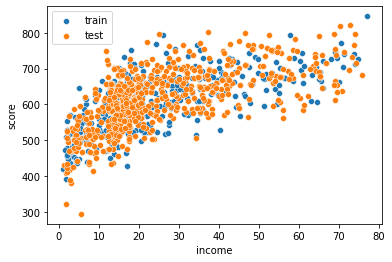

In [11]:
sns.scatterplot(x=X_train['income'], y=y_train, label='train')
sns.scatterplot(x=X_test['income'], y=y_test, label='test')

## Linear Regression:

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

<AxesSubplot:xlabel='income', ylabel='score'>

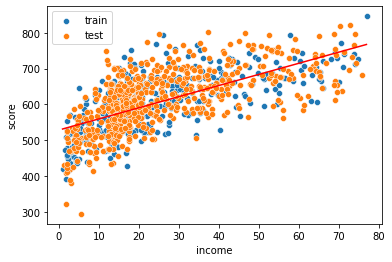

In [13]:
sns.scatterplot(x=X_train['income'], y=y_train, label='train')
sns.scatterplot(x=X_test['income'], y=y_test, label='test')

x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.lineplot(x=x_range,y=y_hat,color="red")

## Decision Tree:

In [17]:
from sklearn.tree import DecisionTreeRegressor
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)

DecisionTreeRegressor()

C:\Users\mrho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


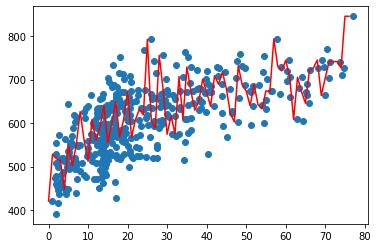

In [18]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart.predict(x_range), color='r')

In [19]:
cart2 = DecisionTreeRegressor(max_depth=2)
cart2.fit(X_train[['income']], y_train)

DecisionTreeRegressor(max_depth=2)

C:\Users\mrho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


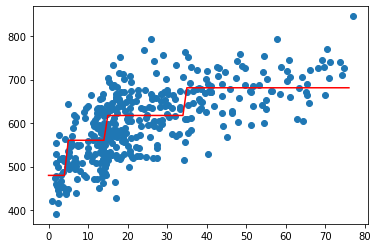

In [20]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart2.predict(x_range), color='r')

In [22]:
cart3 = DecisionTreeRegressor(max_depth=3)
cart3.fit(X_train[['income']], y_train)

DecisionTreeRegressor(max_depth=3)

C:\Users\mrho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


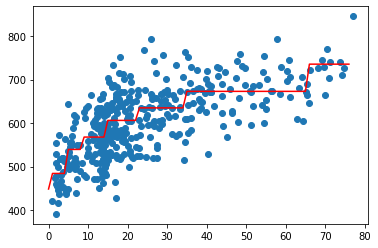

In [24]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart3.predict(x_range), color='r')

In [32]:
cart4 = DecisionTreeRegressor(max_depth=4)
cart4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

C:\Users\mrho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


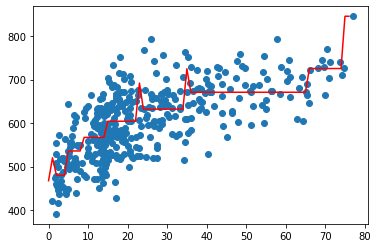

In [28]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart4.predict(x_range), color='r')

## Random Forest:
Pleas read about [hypterparameters](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

C:\Users\mrho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


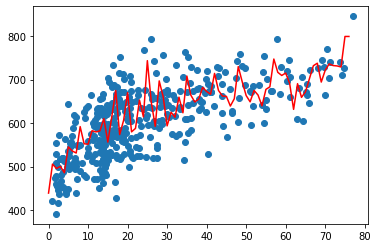

In [38]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(max_depth=2)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

C:\Users\mrho\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


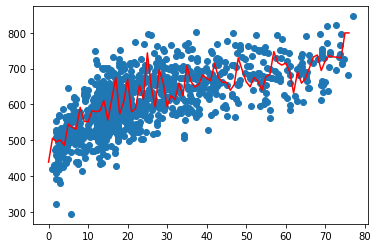

In [40]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)


plt.scatter(data['income'], data['score'])
plt.plot(rf.predict(x_range), color='r')

## XGBoost

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

[Further reading](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

In [1]:
# !pip install xgboost

In [46]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

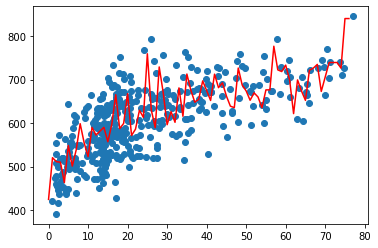

In [47]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(xgb.predict(x_range), color='r')

Let's play around with some [parameters](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) to improve the results.

In [48]:
xgb2 = XGBRegressor(max_depth=2)
xgb2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

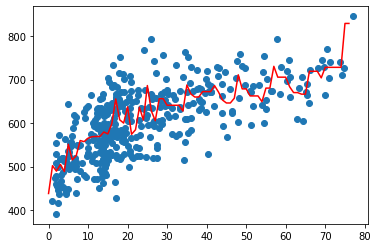

In [49]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(xgb2.predict(x_range), color='r')

## Model Selection!

In [50]:

from sklearn.metrics import mean_squared_error
losses = {}
losses['Linear'] = mean_squared_error(y_test, lr.predict(X_test))
losses['Tree'] = mean_squared_error(y_test, cart.predict(X_test))
losses['Tree: max2'] = mean_squared_error(y_test, cart2.predict(X_test))
losses['Tree: max3'] = mean_squared_error(y_test, cart3.predict(X_test))
losses['Tree: max4'] = mean_squared_error(y_test, cart4.predict(X_test))
losses['Random Foreset'] = mean_squared_error(y_test, rf.predict(X_test))
losses['Random Forest: max2'] = mean_squared_error(y_test, rf2.predict(X_test))
losses['XGBoost'] = mean_squared_error(y_test, xgb.predict(X_test))
losses['XGBoost: max2'] = mean_squared_error(y_test, xgb.predict(X_test))
for key, value in losses.items():
    print(f'{key:25}{value}')

Linear                   4015.999732119273
Tree                     6627.116722927048
Tree: max2               3979.9725430179333
Tree: max3               3608.0172479767507
Tree: max4               3903.598678511206
Random Foreset           4937.356952619928
Random Forest: max2      3625.78415175147
XGBoost                  5262.000179994098
XGBoost: max2            5262.000179994098
